In [1]:
import os
import time
import random; random.seed(0)
import numpy as np; np.random.seed(0)
import math

import matplotlib.pyplot as plt
from PIL import Image

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames
from ai2thor.controller import Controller

from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

In [2]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.distributions import Categorical

import clip

# Set random seeds for maintaining reproducibility
os.environ['PYTHONHASHSEED'] = str(0)
torch.backends.cudnn.deterministic = True

In [3]:
from ppo import PPOAgent

from train import (
    process_inputs, random_policy, train_ppo
)

In [4]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Set Environment

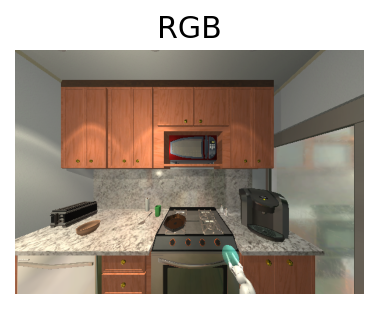

In [5]:
floor_index = random.randint(0, 30)
floor_index = 10

controller = Controller(
    agentMode="arm",
    massThreshold=None,
    visibilityDistance=0.50,
    scene=f"FloorPlan{floor_index}",

    # step sizes
    gridSize=0.25,
    
    # image modalities
    renderInstanceSegmentation=False,
    renderDepthImage=False,
    renderSemanticSegmentation=False,
    renderNormalsImage=False,
    
    # camera properties
    width = 600,
    height = 420,
    fieldOfView = 120,
    
    # set seed for reproducibility
    seed=90,
)

plot_frames(controller.last_event)
controller.reset(f"FloorPlan{floor_index}");

## Set Configs

In [6]:
is_cuda = torch.cuda.is_available()

if is_cuda: device = torch.device('cuda')
else: device = torch.device('cpu')

STATE_DIM = SCREEN_WIDTH = SCREEN_HEIGHT = 224 # Resnet's input size

In [7]:
action_space = ["MoveAgent", "RotateAgent", "MoveArm", "MoveArmBase", "LookUp", "LookDown"]

In [8]:
instruction = "Pick up the red tomato on the table"

## Load Model

In [9]:
# Not implemented yet as the policy
ppo_agent = PPOAgent(state_dim=STATE_DIM, action_dim = len(action_space))

## Run Environment

Step 1: Action=MoveArmBase, Instruction: "Pick up the red tomato on the table", Similarity=0.1752


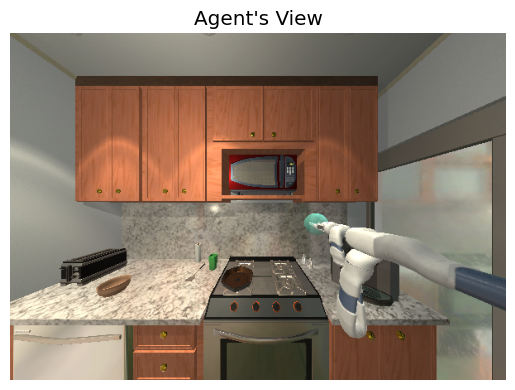

Step 2: Action=MoveArmBase, Instruction: "Pick up the red tomato on the table", Similarity=0.1447


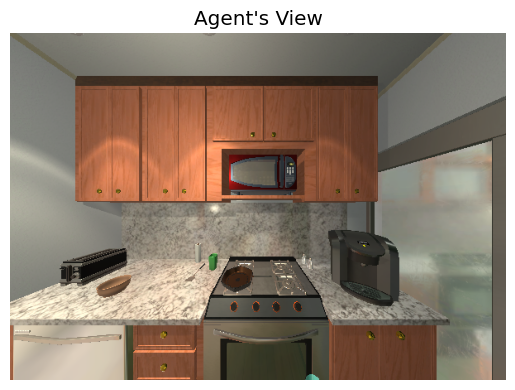

Step 3: Action=LookUp, Instruction: "Pick up the red tomato on the table", Similarity=0.1761


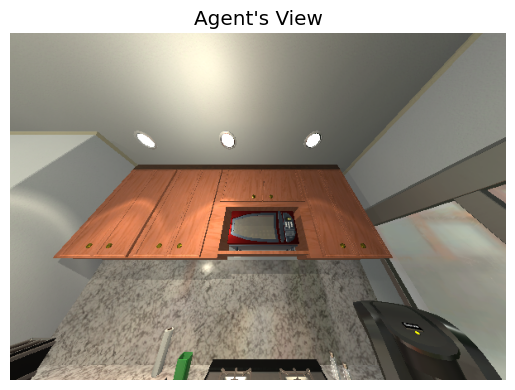

Step 4: Action=MoveArmBase, Instruction: "Pick up the red tomato on the table", Similarity=0.1761


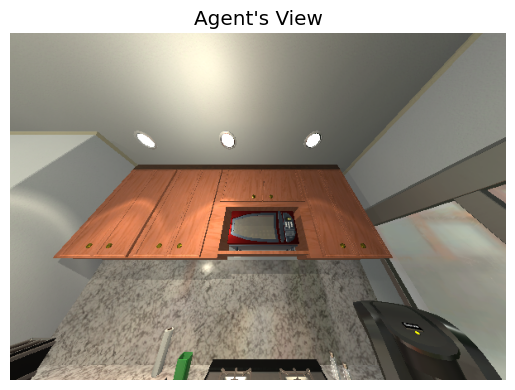

Step 5: Action=MoveArm, Instruction: "Pick up the red tomato on the table", Similarity=0.1761


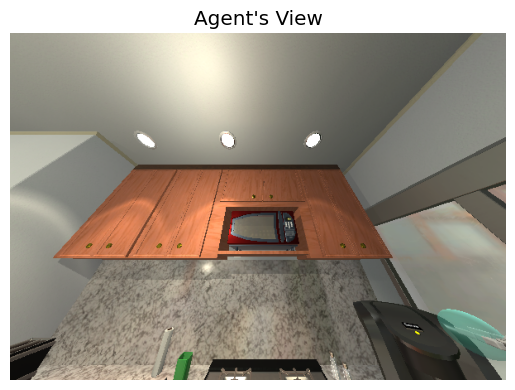

Step 6: Action=RotateAgent, Instruction: "Pick up the red tomato on the table", Similarity=0.1776


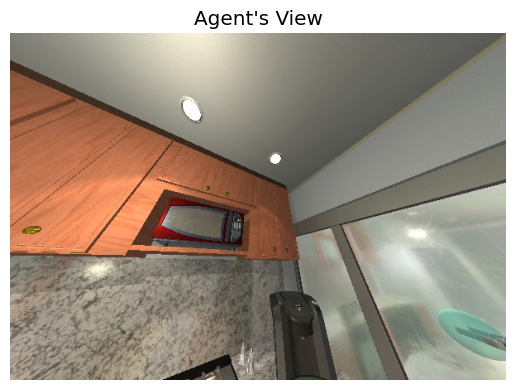

Step 7: Action=MoveArm, Instruction: "Pick up the red tomato on the table", Similarity=0.1776


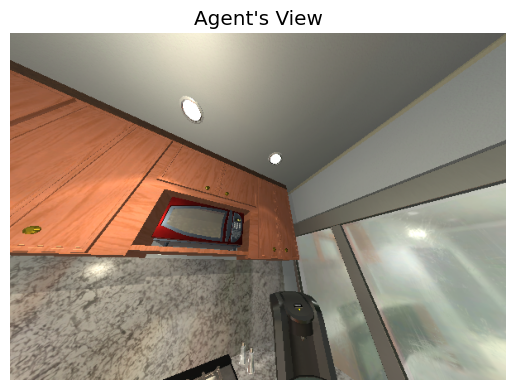

Step 8: Action=LookUp, Instruction: "Pick up the red tomato on the table", Similarity=0.1776


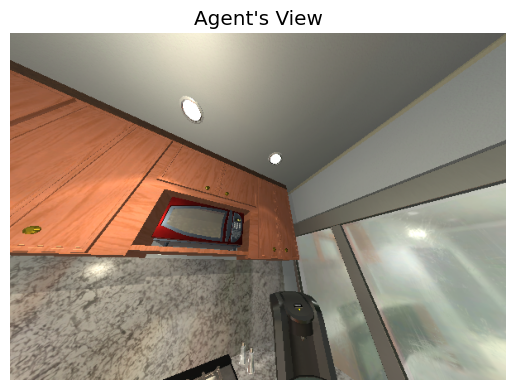

Step 9: Action=LookDown, Instruction: "Pick up the red tomato on the table", Similarity=0.1508


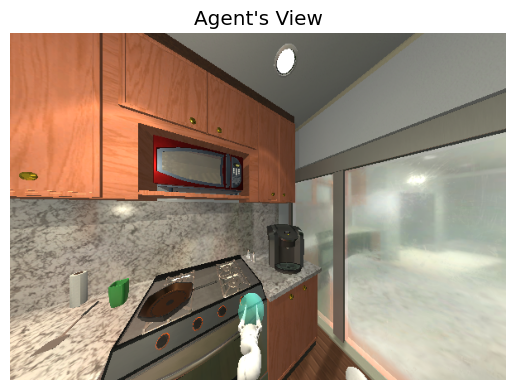

Step 10: Action=LookUp, Instruction: "Pick up the red tomato on the table", Similarity=0.1776


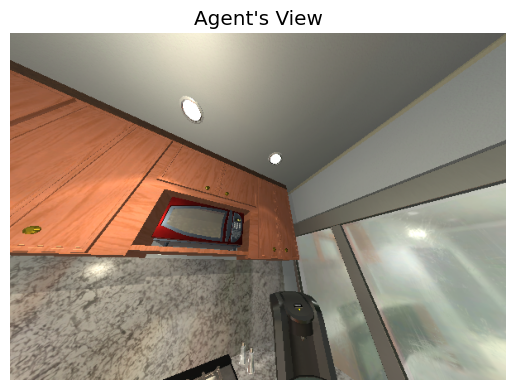

In [10]:
random_policy(controller, action_space, instruction, num_steps=10)
# train_ppo(controller, ppo_agent, action_space, state_dim, num_episodes=1000, max_timesteps=200)

controller.stop()

---